## Background

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import sklearn.mixture as mixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import sys
sys.path.append('../resources')
import w8support as w8s

# Make sure the pic subdirectory exists
import os, errno
try:
    os.makedirs('pic')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

%matplotlib inline

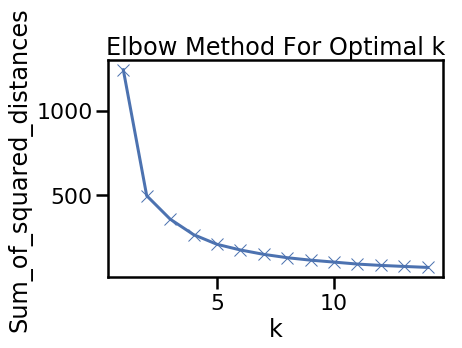

In [22]:
featureSub = pd.read_csv("oheTransformedData.csv")

from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(featureSub)
data.shape

mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Clustering Task 2 - K-means

0.19945502281188965


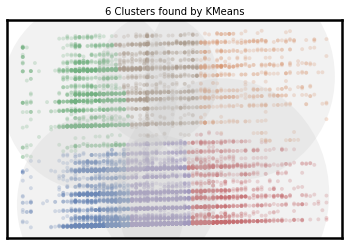

In [23]:
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 15, 'linewidths':0}
paletteName = 'deep'
fontSize = 10
fc = '#cccccc'

from scipy.spatial.distance import cdist
outFile = 'pic/kmeans6_generated.pdf'
nClusters = 6
clusterParams = {'n_clusters':nClusters, 'random_state':0}
algName = "KMeans"

start_time = time.time()
kmeans = cluster.KMeans(**clusterParams)
labels = kmeans.fit_predict(data)
# Subsequently, this will be invoked using a function call of the form
# kmeans, labels = w8s.fitClusterLabels(data, cluster.KMeans, (), clusterParams)
end_time = time.time()
elapsed_time = end_time-start_time
print(elapsed_time)

title = '{} Clusters found by {}'.format(str(nClusters),algName)
plt = w8s.plot_2dClusters(data, labels, title, paletteName, fontSize, plot_kwds)
outFile = 'pic/{}{}_generated.pdf'.format(algName,str(nClusters))
plt.savefig(outFile)

title = '{} Clusters (with regions) found by {}'.format(str(nClusters),algName)
centres = kmeans.cluster_centers_
radii = [cdist(data[labels == i], [center]).max()
         for i, center in enumerate(centres)]
plt = w8s.overlayDisks(plt, centres, radii, fc, plot_kwds)
outFile = 'pic/{}{}withCentres_generated.pdf'.format(algName,str(nClusters))
plt.savefig(outFile)

In [24]:
# Add cluster labels to original dataframe for review and interpretation of cluster results.
featureSub['cluster'] = labels 

featureSub.head(50)

,Years_on_Internet-0,Years_on_Internet-1,Years_on_Internet-2,Years_on_Internet-3,Years_on_Internet-4,Web_Ordering-0,Web_Ordering-1,Web_Ordering-2,Not_Purchasing_Privacy,Not_Purchasing_Prefer_people,Not_Purchasing_Too_complicated,Not_Purchasing_Easier_locally,Not_Purchasing_Security,Age,cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,41.0,4
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,1,28.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,1,0,25.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,28.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,17.0,0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,0,55.0,3
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,53.0,3
7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,1,25.0,2
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1,1,32.0,4
9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,65.0,1


#### Advantages / Disadvantages of K-Means for Internet Usage DataSet:

<b>Advantages</b>	

• K-Means was quite easy to	implement.
• Using the K-Means elbow technique I had a good idea of how many nClusters to set from the beginning.
• K-Means is quite fast too run in comparison to the other clustering techniques used.	
• K-Means can produce	tighter	clusters than hierarchical	clustering. This can be seen in the cluster output on the scatterplot results.	

<b>Disavantages</b>

• Initial	seeds	have	a	strong	impact	on	the	final	results	
• The	order	of	the	data	has	an	impact	on	the	final	results	
• Sensitive	to	scale:	rescaling	your	datasets	(normalization	or	standardization)	will	
completely	change	results.	While	this	itself	is	not	bad,	not	realizing	that	you	have	to	
pay	extra	attention to	scaling	your	data	might	be	bad.		

    